# Convergence properties
This notebook will be used to study the properties of convergence of the BCPNN. As things stand now there is a couple of things to check out for. 

* How does the number of correctly recalled and well behaved patterns scaled with the size of the network.
* How this scaling is affected by the introduction of adapation
* How this scaling is affected by the introduction of biases
* Finally how learning in time affects this scaling. 

Let's begging by doing the usual loading of functions 

In [1]:
from __future__ import print_function
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mpl_toolkits.axes_grid1 import make_axes_locatable

from connectivity_functions import get_beta, get_w
from connectivity_functions import calculate_probability, calculate_coactivations
from data_transformer import build_ortogonal_patterns
from convergence_functions import test_convergence_ratios
from network import BCPNN

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

%matplotlib inline
sns.set(font_scale=2.5)

Now we will oportunity of running this anlaysis with the last version of git that run everything properly.

In [2]:
# Git loading should be here

## Small network properties
We start with a small network just to see how it works. We try to learn as much ortogonal patterns as the network allow us to and see that it breaks down at approximately 15 hypercolumns

First let's seet the parameters 

In [6]:
dt = 0.01
T = 1
time = np.arange(0, T + dt, dt)


g_a = 0.0  # No adaptation
g_beta = 1.0  # No bias gain
g_w = 1.0  # No weight gain
prng = np.random.RandomState(seed=0)
N = 50

convergence_fractions = []
well_behaved_fractions = []

numbers = np.arange(2, 21, dtype=int)

Now let's run the convergence test for different number of hypercolumns. We remember that in this analysis we have equal number of minicolumns and hypercolumns

In [7]:
for number in numbers:

    hypercolumns = number
    minicolumns = number

    patterns_dic = build_ortogonal_patterns(hypercolumns, minicolumns)
    patterns = list(patterns_dic.values())

    P = calculate_coactivations(patterns)
    p = calculate_probability(patterns)

    w = get_w(P, p)
    beta = get_beta(p)


    nn = BCPNN(hypercolumns, minicolumns, beta, w, p_pre=p, p_post=p, p_co=P,
               g_a=g_a, g_beta=g_beta, g_w=g_w, prng=prng)

    fraction_of_convergence, fraction_of_well_behaved = test_convergence_ratios(nn, N, time, patterns)

    convergence_fractions.append(fraction_of_convergence * 100)
    well_behaved_fractions.append(fraction_of_well_behaved * 100)

Finally we plot everything

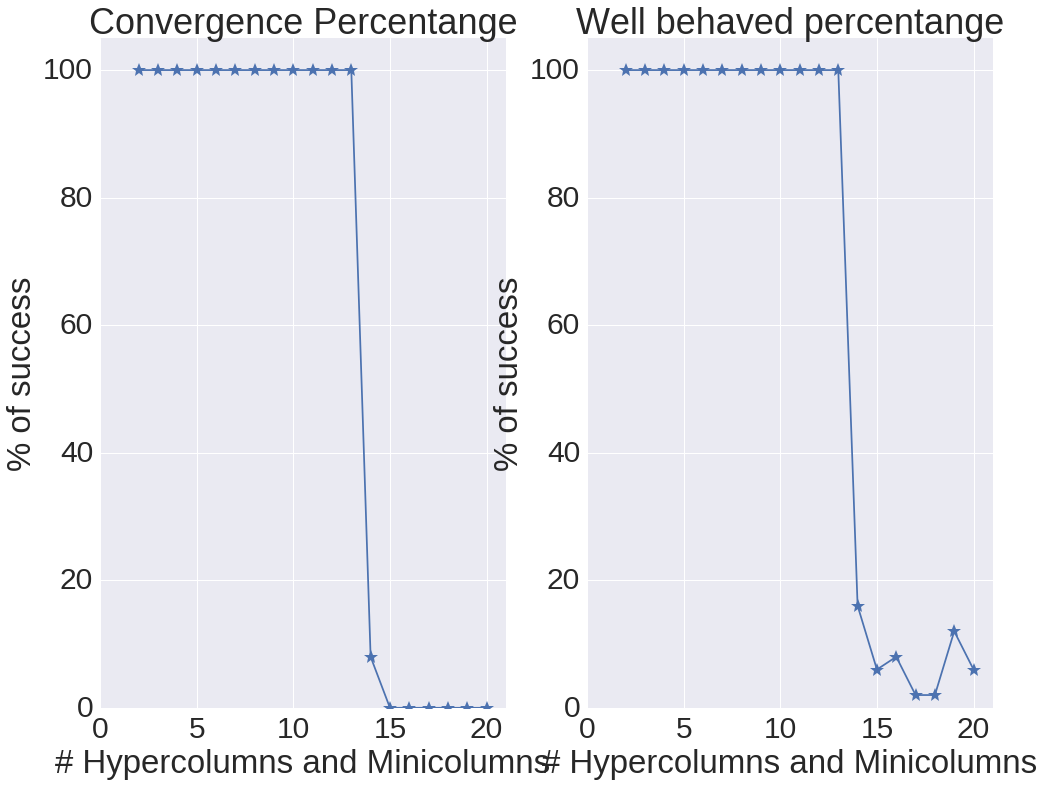

In [8]:
fig = plt.figure(figsize=(16 ,12))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(numbers, convergence_fractions, '*-', markersize=15)
ax1.set_xlabel('# Hypercolumns and Minicolumns')
ax1.set_ylabel('% of success')

ax1.set_ylim([0, 105])
ax1.set_xlim((0, numbers[-1] + 1))
ax1.set_title('Convergence Percentange')


ax2.plot(numbers, well_behaved_fractions, '*-', markersize=15)
ax2.set_xlabel('# Hypercolumns and Minicolumns')
ax2.set_ylabel('% of success')


ax2.set_ylim([0, 105])
ax2.set_xlim((0, numbers[-1] + 1))
ax2.set_title('Well behaved percentange')

plt.show()

### Adding adaptation 
We run the same process than before but adding adaptation in order to see the effects of it

In [9]:
dt = 0.01
T = 1
time = np.arange(0, T + dt, dt)


g_a = 90.0  # No adaptation
g_beta = 1.0  # No bias gain
g_w = 1.0  # No weight gain
prng = np.random.RandomState(seed=0)
N = 50

convergence_fractions = []
well_behaved_fractions = []

numbers = np.arange(2, 21, dtype=int)

In [10]:
for number in numbers:

    hypercolumns = number
    minicolumns = number

    patterns_dic = build_ortogonal_patterns(hypercolumns, minicolumns)
    patterns = list(patterns_dic.values())

    P = calculate_coactivations(patterns)
    p = calculate_probability(patterns)

    w = get_w(P, p)
    beta = get_beta(p)


    nn = BCPNN(hypercolumns, minicolumns, beta, w, p_pre=p, p_post=p, p_co=P,
               g_a=g_a, g_beta=g_beta, g_w=g_w, prng=prng)

    fraction_of_convergence, fraction_of_well_behaved = test_convergence_ratios(nn, N, time, patterns)

    convergence_fractions.append(fraction_of_convergence * 100)
    well_behaved_fractions.append(fraction_of_well_behaved * 100)

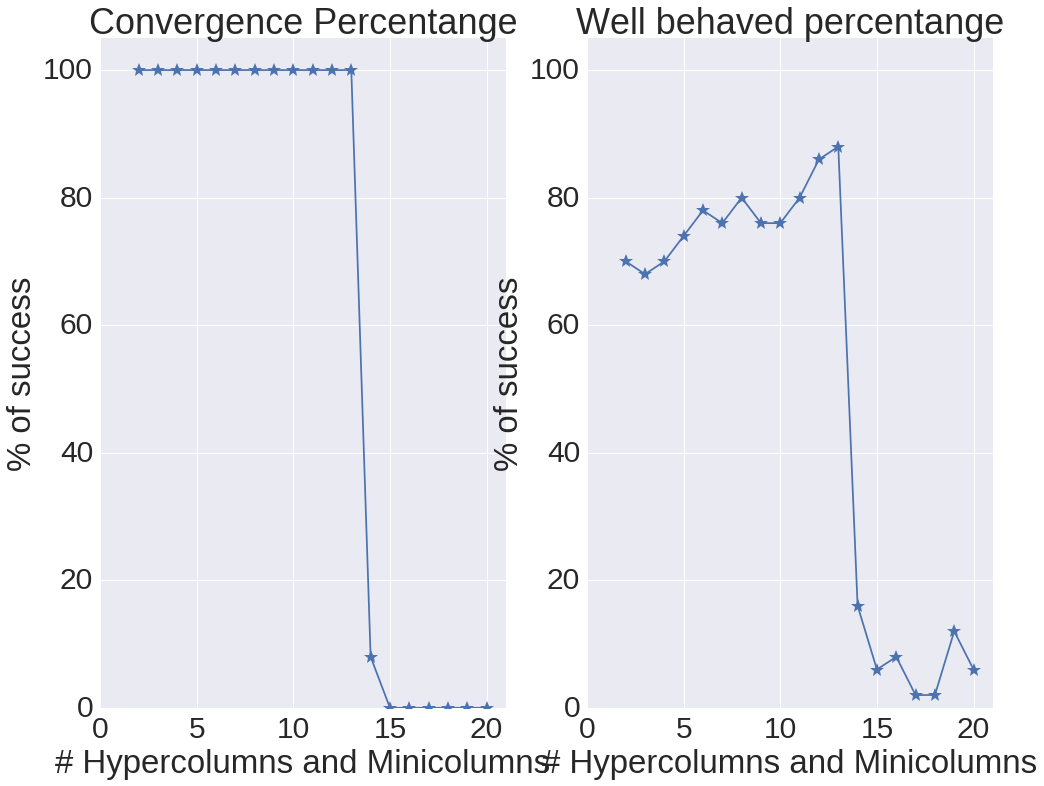

In [11]:
fig = plt.figure(figsize=(16 ,12))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(numbers, convergence_fractions, '*-', markersize=15)
ax1.set_xlabel('# Hypercolumns and Minicolumns')
ax1.set_ylabel('% of success')

ax1.set_ylim([0, 105])
ax1.set_xlim((0, numbers[-1] + 1))
ax1.set_title('Convergence Percentange')


ax2.plot(numbers, well_behaved_fractions, '*-', markersize=15)
ax2.set_xlabel('# Hypercolumns and Minicolumns')
ax2.set_ylabel('% of success')


ax2.set_ylim([0, 105])
ax2.set_xlim((0, numbers[-1] + 1))
ax2.set_title('Well behaved percentange')

plt.show()